# **Download the apple stock data set**

In [35]:

import yfinance as yf
import pandas as pd

# Define the ticker symbol and date range
ticker = "AAPL"
start_date = "2010-01-01"
end_date = "2024-01-01"  # Or today's date

# Download the data
data = yf.download(ticker, start=start_date, end=end_date)

data.to_csv("apple_stock_data.csv")
display(data.head())
display(data.info())

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.440332,6.455078,6.391279,6.422878,493729600
2010-01-05,6.451466,6.487879,6.417460,6.458087,601904800
2010-01-06,6.348847,6.477046,6.342226,6.451466,552160000
2010-01-07,6.337109,6.379843,6.291066,6.372319,477131200
2010-01-08,6.379243,6.379845,6.291370,6.328686,447610800


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3522 entries, 2010-01-04 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   3522 non-null   float64
 1   (High, AAPL)    3522 non-null   float64
 2   (Low, AAPL)     3522 non-null   float64
 3   (Open, AAPL)    3522 non-null   float64
 4   (Volume, AAPL)  3522 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 165.1 KB


None

# **Exploratry Data Analysis**

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

## **Apple Stock Closing Prices Over Time**

This plot visualizes the closing prices of Apple stock over the given time period. The x-axis represents the date, while the y-axis represents the closing price. This helps in understanding the overall trend and volatility of Apple's stock performance.


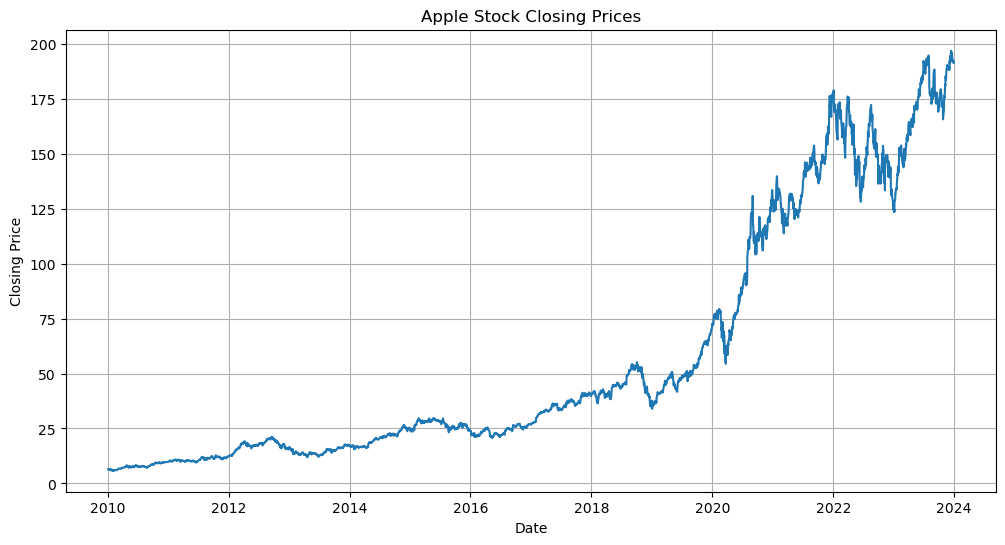

In [37]:
# Visualize closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title('Apple Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

## **Apple Stock Trading Volume Over Time**

This plot represents the trading volume of Apple stock over the given time period. The x-axis denotes the date, while the y-axis shows the volume of shares traded. Analyzing trading volume helps in understanding market activity and identifying periods of high or low investor interest.


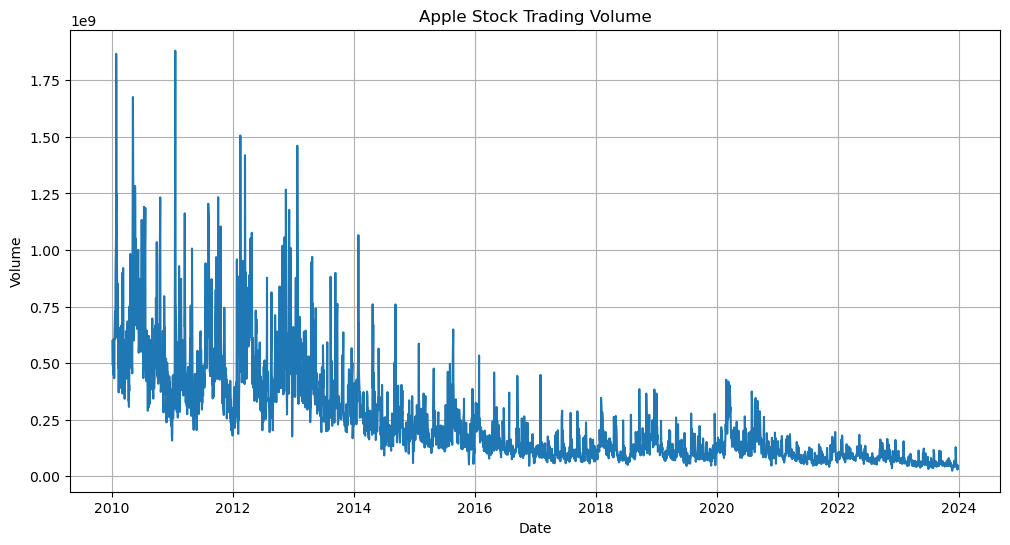

In [38]:

# Volume traded over time
plt.figure(figsize=(12, 6))
plt.plot(data['Volume'])
plt.title('Apple Stock Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

## **Apple Stock with Moving Averages**

This plot displays the closing price of Apple stock along with two moving averages:

- **50-day Moving Average (MA50)**: Helps in identifying short-term trends.
- **200-day Moving Average (MA200)**: Provides insight into long-term trends.

The moving averages smooth out price fluctuations, making it easier to analyze overall stock trends and potential buy/sell signals.


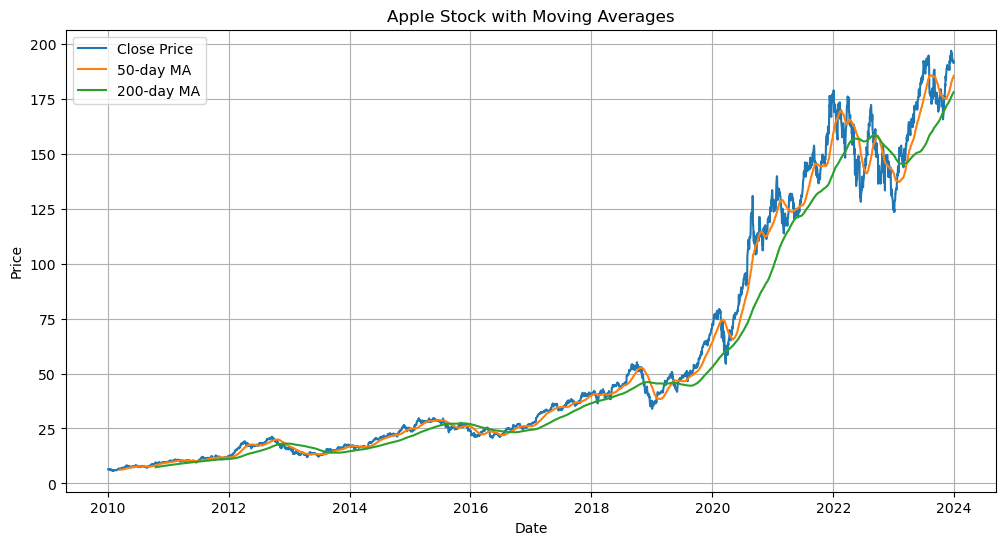

In [39]:


# Moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA50'], label='50-day MA')
plt.plot(data['MA200'], label='200-day MA')
plt.title('Apple Stock with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

## **Distribution of Daily Returns**

This histogram visualizes the distribution of daily returns for Apple stock. The daily return is calculated as the percentage change in the closing price from one day to the next.

- The **x-axis** represents the daily return percentage.
- The **y-axis** shows the frequency of occurrence.
- The **KDE (Kernel Density Estimation) curve** helps in understanding the probability distribution.

Analyzing the distribution of returns helps in assessing the stock's volatility and potential risk.


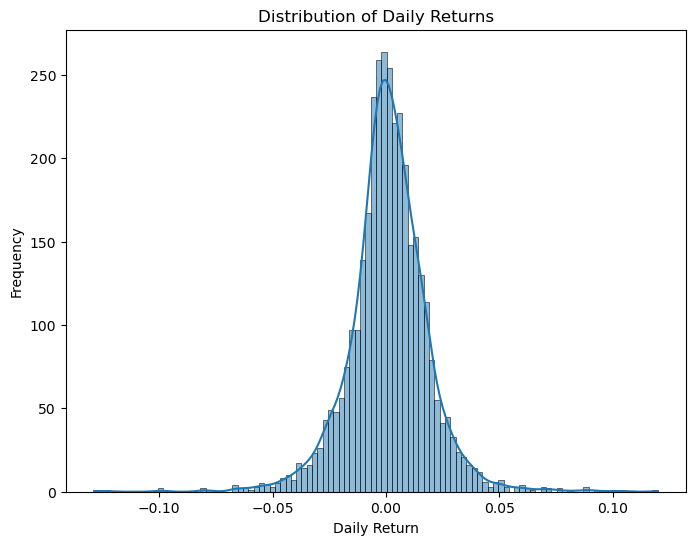

In [40]:

# Distribution of daily returns
data['Daily_Return'] = data['Close'].pct_change()
plt.figure(figsize=(8, 6))
sns.histplot(data['Daily_Return'].dropna(), kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


## **Boxplot of Daily Returns**

This boxplot visualizes the distribution of daily returns for Apple stock, highlighting key statistical measures:

- The **box** represents the interquartile range (IQR), showing the middle 50% of the data.
- The **line inside the box** indicates the median daily return.
- The **whiskers** extend to the smallest and largest values within 1.5 times the IQR.
- **Outliers** (individual points outside the whiskers) indicate days with unusually high or low returns.

This visualization helps in identifying potential anomalies and assessing the stock's volatility.


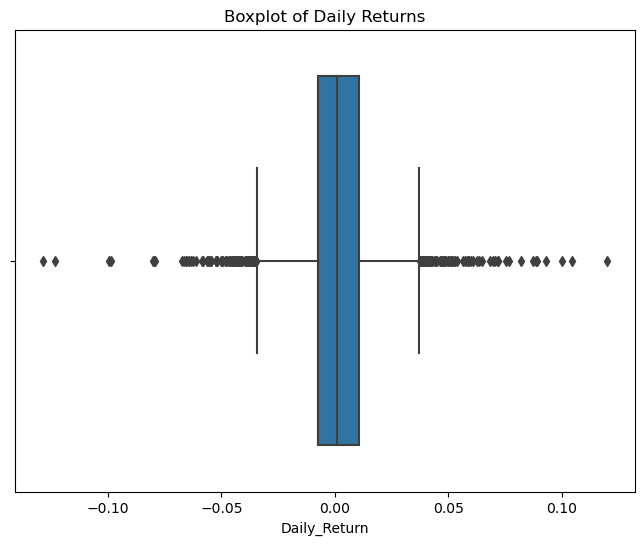

In [41]:
# Boxplot of daily returns
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Daily_Return'].dropna())
plt.title('Boxplot of Daily Returns')
plt.show()


# **Data Scaling using MinMaxScaler**


In this step, the **MinMaxScaler** is used to normalize the closing price values to a range between **0 and 1**.

### Why Scaling?
- Scaling ensures that all values fall within the same range, improving the performance and stability of machine learning models.
- It helps prevent large values from dominating smaller ones, especially in models like LSTMs that are sensitive to input magnitude.

This transformation is essential for training deep learning models efficiently.


In [42]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
# Data scaling using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))


# **Splitting Data into Training and Testing Sets**

### Purpose:
The dataset is split into **80% training data** and **20% testing data** to train and evaluate the model.

### Steps:
1. **Training Data:**
   - The first **80% of the dataset** is used for training.
   - A sliding window approach is applied, where each sequence contains the last **60 days of closing prices** as input, and the **next day's closing price** as the target.

2. **Testing Data:**
   - The remaining **20% of the dataset** is used for testing.
   - The same **sliding window** method is used to prepare the test set.

### **Why Use a Sliding Window?**
- It allows the model to learn **temporal dependencies** in stock prices.
- Helps capture trends and patterns in the stock market.

This step is crucial for **training time-series models like LSTMs**.


In [43]:
# Split data into training and testing sets
training_data_len = int(np.ceil(len(scaled_data) * .8))  # 80% for training
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Test data
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = scaled_data[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


# **Building the LSTM Model**

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import time



### Purpose:
The **Long Short-Term Memory (LSTM)** model is used to predict stock prices based on historical closing prices.

### Model Architecture:
1. **LSTM Layer 1**:
   - Contains **100 units**.
   - `return_sequences=True` ensures that the next LSTM layer receives the entire sequence.
   
2. **LSTM Layer 2**:
   - Contains **50 units**.
   - `return_sequences=False` as it is the final LSTM layer.

3. **Dense Layer 1**:
   - Contains **25 neurons** for further feature extraction.

4. **Dense Layer 2 (Output Layer)**:
   - Contains **1 neuron**, which predicts the next day's closing price.

### Compilation:
- **Optimizer**: `adam` (Adaptive Moment Estimation) is used for efficient training.
- **Loss Function**: `mean_squared_error` (MSE) is chosen as it is standard for regression problems.

This model captures **temporal dependencies** in stock prices, making it suitable for time-series forecasting.


## **Training the LSTM Model**


### Training the Model:
- **Batch Size:** `1` (Each training sample is processed individually).
- **Epochs:** `1` (For demonstration purposes; can be increased for better performance).
- **Training Time:** The time taken for training is recorded to evaluate efficiency.

The model is trained on the preprocessed stock data, learning patterns from historical prices.


In [45]:
# Data scaling using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Split data into training and testing sets
training_data_len = int(np.ceil(len(scaled_data) * .8))  # 80% for training
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Test data
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = scaled_data[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


C:\Users\BAHU Computers\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2758/2758 ━━━━━━━━━━━━━━━━━━━━ 70s 24ms/step - loss: 0.0014
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
RMSE: 4.590571206999608
MAE: 3.5570524389093574
R-squared: 0.9441739651251563
MSE: 21.07334400653384

Training time: 70.1959 seconds
Testing time: 0.9214 seconds


C:\Users\BAHU Computers\AppData\Local\Temp\ipykernel_10276\2683901474.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


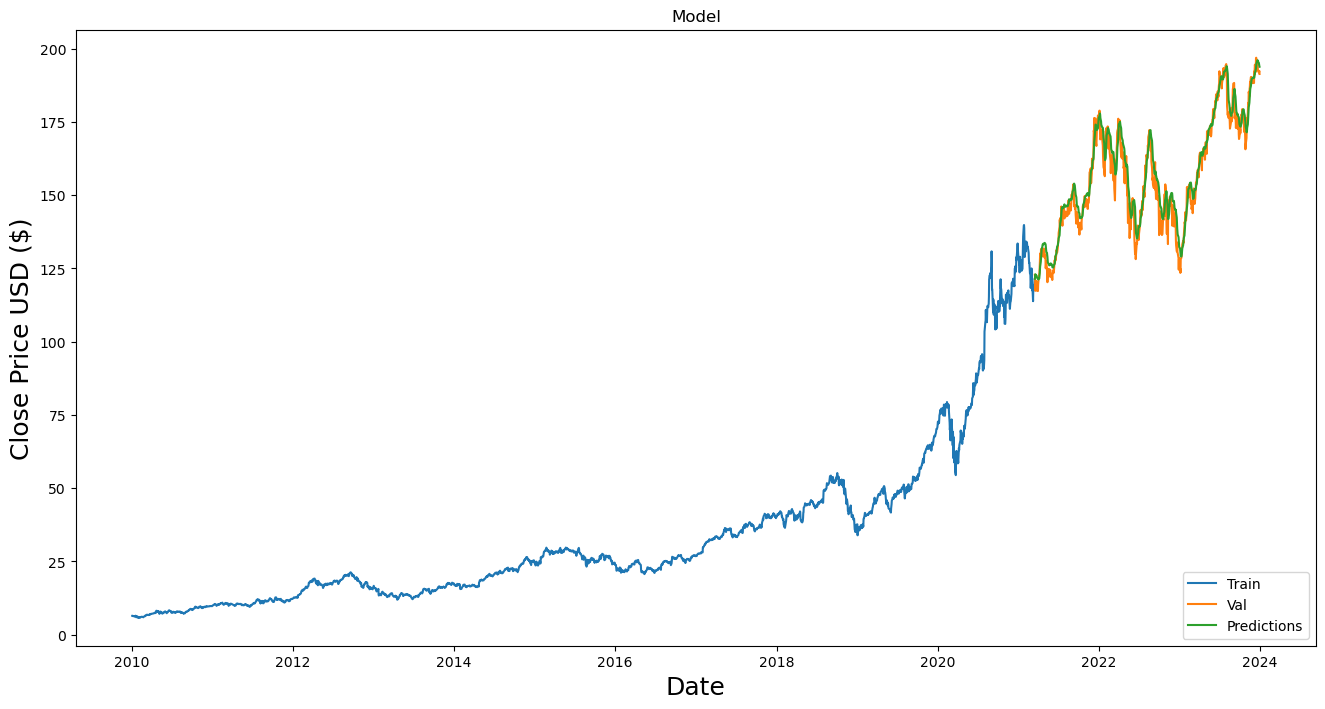

In [46]:
# prompt: apply min max scaller and train the lstm model on the dataset and evalute the model also plot the actual and predicted value of the model   evalute the model on more multiple parameter and also calculte the trainign and testing  time the graph must be high visulization

import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import time
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Build the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))

model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
start_time = time.time()
model.fit(x_train, y_train, batch_size=1, epochs=1) # Reduced epochs for demonstration
end_time = time.time()
training_time = end_time - start_time

# Make predictions
start_time_pred = time.time()
predictions = model.predict(x_test)
end_time_pred = time.time()
testing_time = end_time_pred - start_time_pred

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")
print(f"MSE: {mse}")
print()
print(f"Training time: {training_time:.4f} seconds")
print(f"Testing time: {testing_time:.4f} seconds")

# Plot the actual vs. predicted values
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


# **ARIMA and SARIMA**

In [47]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [48]:

# Prepare the data for time series modeling (using 'Close' price)
data = data['Close']

# Split data into train and test sets
train_data = data[:-30] # Last 30 days for testing
test_data = data[-30:]

# ARIMA Model
p, d, q = 5, 1, 0 #
arima_model = ARIMA(train_data, order=(p, d, q))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.predict(start=len(train_data), end=len(data)-1)


# SARIMA Model
p, d, q = 3, 1, 2
P, D, Q, s = 1, 1, 1, 7 # Seasonal order (seasonal period is 7 days as example)

sarima_model = SARIMAX(train_data, order=(p,d,q), seasonal_order=(P,D,Q,s))
sarima_model_fit = sarima_model.fit()
sarima_predictions = sarima_model_fit.predict(start=len(train_data), end=len(data)-1)



C:\Users\BAHU Computers\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\BAHU Computers\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\BAHU Computers\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\BAHU Computers\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.

In [49]:
# Evaluation Metrics
def evaluate_model(predictions, actual):
      rmse = np.sqrt(mean_squared_error(actual, predictions))
      mae = mean_absolute_error(actual, predictions)
      r2 = r2_score(actual, predictions)
      mse = mean_squared_error(actual, predictions)  # Calculate MSE
      return rmse, mae, r2, mse

arima_rmse, arima_mae, arima_r2, arima_mse = evaluate_model(arima_predictions, test_data)
sarima_rmse, sarima_mae, sarima_r2, sarima_mse = evaluate_model(sarima_predictions, test_data)

print("ARIMA Model Evaluation:")
print(f"RMSE: {arima_rmse}")
print(f"MAE: {arima_mae}")
print(f"R-squared: {arima_r2}")
print(f"MSE: {arima_mse}")  # Print MSE

print("\nSARIMA Model Evaluation:")
print(f"RMSE: {sarima_rmse}")
print(f"MAE: {sarima_mae}")
print(f"R-squared: {sarima_r2}")
print(f"MSE: {sarima_mse}")  # Print MSE

ARIMA Model Evaluation:
RMSE: 5.527269378590812
MAE: 4.859681394036055
R-squared: -3.3704239810884165
MSE: 30.550706783507653

SARIMA Model Evaluation:
RMSE: 4.6474967126348865
MAE: 4.011596340396494
R-squared: -2.0898720155550876
MSE: 21.59922569395208


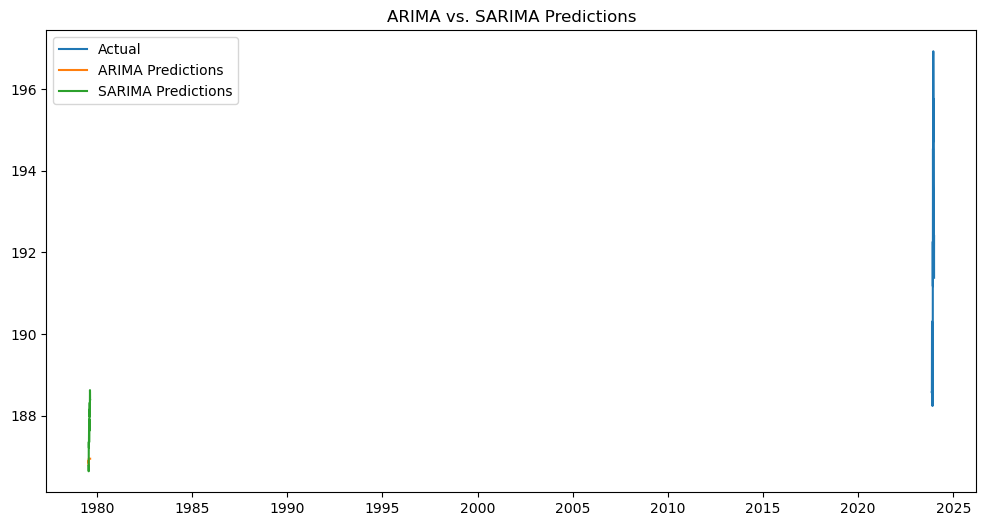

In [50]:
# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual')
plt.plot(arima_predictions, label='ARIMA Predictions')
plt.plot(sarima_predictions, label='SARIMA Predictions')
plt.legend()
plt.title('ARIMA vs. SARIMA Predictions')
plt.show()